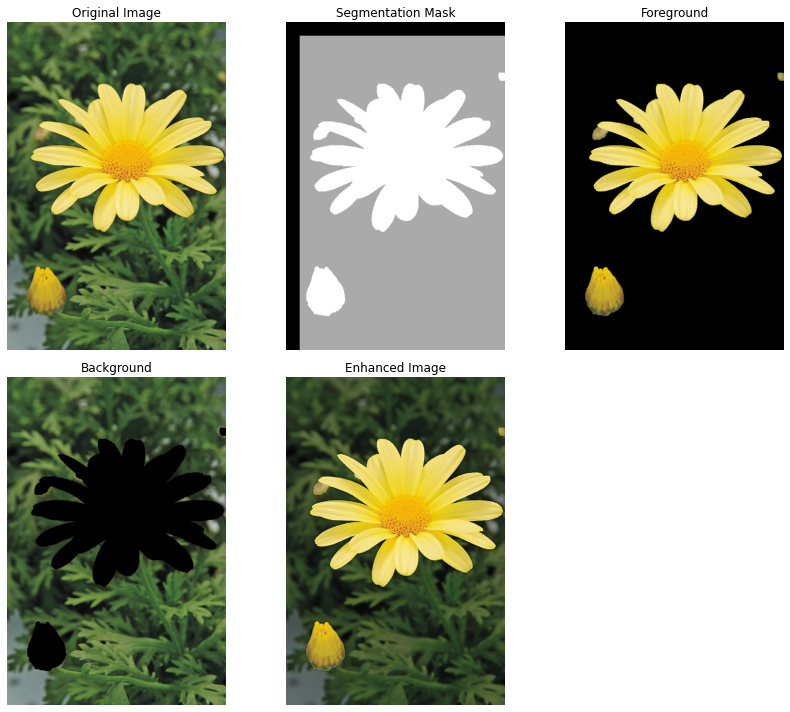

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('yellow_daisy.jpeg')

# grabCut for segmentation
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)  # Define the rectangle around the object
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create the foreground and background masks
fg_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
bg_mask = 1 - fg_mask

# Apply masks to the original image
foreground = cv2.bitwise_and(image, image, mask=fg_mask)
background = cv2.bitwise_and(image, image, mask=bg_mask)

# Blur the background
blurred_background = cv2.GaussianBlur(background, (15, 15), 0)


plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Segmentation Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Foreground')
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Background')
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Enhanced Image')
enhanced_image = cv2.addWeighted(foreground, 1, blurred_background, 0.7, 0)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.tight_layout()
plt.show()